This notebook provides a procedure to compute the deformation of a bond. 

Comentaris. La referència de l'energia, estrictament parlant, hauria de ser l'energia dels fragments. Això no es té en compte. Es pot fixar la referència d'energia en la conformació més estable, igual que en els dihedres o els angles. 

In [61]:
# general imports
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('lines', lw=1, color='b')
rc('legend', loc='best')
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.edgecolor"] = 'black'
plt.rcParams['legend.borderpad'] = 0.25
plt.rcParams['legend.fontsize'] = 11
plt.rcParams.update({'pgf.preamble': r'\usepackage{amsmath}'})

from ase.visualize import view
from ase.io import trajectory
from ase import build

In [62]:
def evaluate_bond(molecule, bond_ids, mask,  calculator_list, search_space=None , resolution=None, save_dir='./'):
    '''
    Definition
    ----------
    Evaluates the PES of the breaking of a bond.
    bond_ids contain the index of the atoms that form the bond. 
    '''

    # set scan space and resolution. 
    if resolution is None:
        resolution = 100
    if search_space is None:
        search_space = [1.0, 6.0]
    dist_list = np.linspace(search_space[0], search_space[1], resolution)

    print(f'computing {molecule[bond_ids[0]].symbol}{molecule[bond_ids[0]].index}-{molecule[bond_ids[1]].symbol}{molecule[bond_ids[1]].index} PES\nscan range {search_space} Å')
    print(f'evaluating {len(dist_list)} distances')
    print(f'distances:\n{dist_list}\n')

    if len(calculator_list) == 1:
        traj_path = os.path.join(save_dir, 'bond_scan.traj')
        traj = trajectory.TrajectoryWriter(filename=traj_path, mode='w')

    # save energies
    energies = []

    # evaluate each calculator
    for calc_ in calculator_list: 

        calc_energy_list = []

        for d in dist_list:

            # define the configuration
            molecule.set_distance(bond_ids[0], bond_ids[1], d, mask=mask, fix=0)
            molecule.calc = calc_
            potential_e = molecule.get_potential_energy()
            calc_energy_list.append(potential_e)
        
            if len(calculator_list) == 1:
                traj.write(molecule)

        # compute reference
        # TODO

        energies.append(calc_energy_list)

        if len(calculator_list) == 1:
            traj.close()

    return dist_list, energies



def plot_bond(distance_list, energy_list, calculator_names, calculator_colors, dist_name='', save_dir=None):
    '''
    Plot a bond scan. 
    '''

    if save_dir is None:
        save_dir = './'

    _color_list = ['black', 'red', 'orange', 'blue']
    _marker_list = ['^', 'd', 'v', 'o']

    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(6,4)) 
    axes.tick_params(bottom=True, top=True, left=True, right=False, direction="in")
    axes.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False, direction="in")

    for k in range(len(calculator_names)):
        
        # gather the minimum energy structure
        idx = np.argmin(energy_list[k][:])
        min_energy = energy_list[k][idx]
        min_dih = distance_list[idx]

        # TODO convert energy from eV/particle to kcal/mol: 1 eV/molecule = 23.0605 kcal/mol

        axes.plot(distance_list, (np.array(energy_list[k][:])-min_energy), label=r'$\textnormal{' + calculator_names[k] + r'}$', color=calculator_colors[k], alpha=0.9)
        axes.scatter(min_dih, min_energy-min_energy, color=_color_list[k], marker=_marker_list[k], label=r'$\textnormal{reference energy at ' + f'{min_dih:.3f}' + r' Å}$')

    axes.set(xlabel=r'$\textnormal{' + f'{dist_name}' + r' bond distance}\;\textnormal{(deg)}$', ylabel=r'$\textnormal{potential energy}\;\textnormal{(eV)}$')
    axes.legend(loc='best')

    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f'{dist_name}'+'bond_PES.png'), dpi=300)
    plt.show(fig)

In [63]:
#=======================#
#       CALCULATOR      #
#=======================#

from mace.calculators import mace_mp, mace_off

macemp = mace_mp(
    model="medium", 
    dispersion=False, 
    default_dtype="float64", 
    device='cpu',
    )

maceoff = mace_off(
    model="medium", 
    device='cpu',
    default_dtype='float64'
    )

calculator_list = [macemp, maceoff]
calculator_names = ['MACE-MP', 'MACE-OFF']
calculator_colors = ['deeppink', 'darkgreen']

calculator_list = [maceoff]
calculator_names = ['MACE-OFF']

ModuleNotFoundError: No module named 'mace'

In [64]:
# calculator 
from torchani.models import ANI1x, ANI2x

ani1x_calc = ANI1x().ase()
ani2x_calc = ANI2x().ase()

# define the calculators
calculator_list = [ani1x_calc, ani2x_calc]

#calculator_names = ['ANI-1x', 'ANI-2x']
calculator_colors = ['deeppink', 'darkgreen']

calculator_list = [ani1x_calc]
CALCULATOR = ani2x_calc
calculator_names = ['ANI-2x']

/Users/sergiortizropero/miniconda3/envs/ASE_ANI/lib/python3.10/site-packages/torchani/resources/
/Users/sergiortizropero/miniconda3/envs/ASE_ANI/lib/python3.10/site-packages/torchani/resources/


0 C
1 C
2 O
3 H
4 H
5 H
6 H
7 H
8 H
computing C1-O2 PES
scan range [1.0, 7.0] Å
evaluating 100 distances
distances:
[1.         1.06060606 1.12121212 1.18181818 1.24242424 1.3030303
 1.36363636 1.42424242 1.48484848 1.54545455 1.60606061 1.66666667
 1.72727273 1.78787879 1.84848485 1.90909091 1.96969697 2.03030303
 2.09090909 2.15151515 2.21212121 2.27272727 2.33333333 2.39393939
 2.45454545 2.51515152 2.57575758 2.63636364 2.6969697  2.75757576
 2.81818182 2.87878788 2.93939394 3.         3.06060606 3.12121212
 3.18181818 3.24242424 3.3030303  3.36363636 3.42424242 3.48484848
 3.54545455 3.60606061 3.66666667 3.72727273 3.78787879 3.84848485
 3.90909091 3.96969697 4.03030303 4.09090909 4.15151515 4.21212121
 4.27272727 4.33333333 4.39393939 4.45454545 4.51515152 4.57575758
 4.63636364 4.6969697  4.75757576 4.81818182 4.87878788 4.93939394
 5.         5.06060606 5.12121212 5.18181818 5.24242424 5.3030303
 5.36363636 5.42424242 5.48484848 5.54545455 5.60606061 5.66666667
 5.72727273 5.7

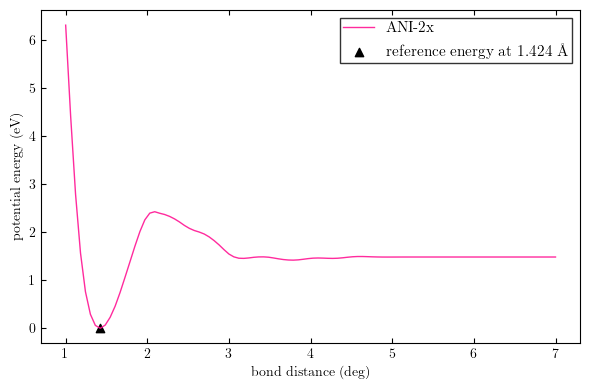

In [65]:
#=======================#
#       PARAMETERS      #
#=======================#

# example: ETHANE
# ethane = build.molecule('C2H6')
# mask = [0, 1, 0, 0, 0, 1, 1, 1]
# bond_ids = [0, 1]


# define the molecule
ethanol = build.molecule('CH3CH2OH')

# select the C-C bond and provide the mask

for atom in ethanol:
    print(atom.index, atom.symbol)
#view(ethanol, viewer='ase')

bond_ids = [1, 2]
mask = [0, 0, 1, 1, 0, 0, 0, 0, 0]

# evaluate the conformations
distances, energies = evaluate_bond(ethanol, bond_ids, mask,  calculator_list, search_space=[1.0, 7.0])
plot_bond(distances, energies, calculator_names, calculator_colors, save_dir='./')

In [66]:
traj = trajectory.TrajectoryReader('./bond_scan.traj')
view(traj, viewer='ngl')

0 C
1 C
2 H
3 H
4 H
5 H
6 H
7 H
computing C0-C1 PES
scan range [1.0, 7.0] Å
evaluating 100 distances
distances:
[1.         1.06060606 1.12121212 1.18181818 1.24242424 1.3030303
 1.36363636 1.42424242 1.48484848 1.54545455 1.60606061 1.66666667
 1.72727273 1.78787879 1.84848485 1.90909091 1.96969697 2.03030303
 2.09090909 2.15151515 2.21212121 2.27272727 2.33333333 2.39393939
 2.45454545 2.51515152 2.57575758 2.63636364 2.6969697  2.75757576
 2.81818182 2.87878788 2.93939394 3.         3.06060606 3.12121212
 3.18181818 3.24242424 3.3030303  3.36363636 3.42424242 3.48484848
 3.54545455 3.60606061 3.66666667 3.72727273 3.78787879 3.84848485
 3.90909091 3.96969697 4.03030303 4.09090909 4.15151515 4.21212121
 4.27272727 4.33333333 4.39393939 4.45454545 4.51515152 4.57575758
 4.63636364 4.6969697  4.75757576 4.81818182 4.87878788 4.93939394
 5.         5.06060606 5.12121212 5.18181818 5.24242424 5.3030303
 5.36363636 5.42424242 5.48484848 5.54545455 5.60606061 5.66666667
 5.72727273 5.78787

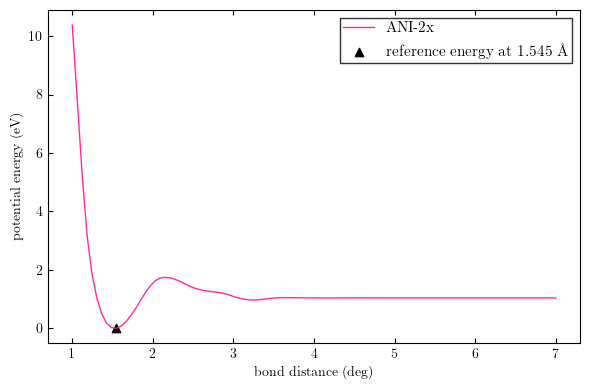

In [67]:
#=======================#
#       PARAMETERS      #
#=======================#

# define the molecule
ethane = build.molecule('C2H6')

# select the C-C bond and provide the mask

for atom in ethane:
    print(atom.index, atom.symbol)
#view(ethanol, viewer='ase')

bond_ids = [0, 1]
mask = [0, 1, 0, 0, 0, 1, 1, 1]

# evaluate the conformations
distances, energies = evaluate_bond(ethane, bond_ids, mask,  calculator_list, search_space=[1.0, 7.0])
plot_bond(distances, energies, calculator_names, calculator_colors, save_dir='./')

In [68]:
#=======================#
#       PARAMETERS      #
#=======================#

from ase.data.pubchem import pubchem_atoms_search


# define the molecule
cyclo = pubchem_atoms_search(smiles='C1=CC=C1')

# select the C-C bond and provide the mask

for atom in cyclo:
    print(atom.index, atom.symbol)
#view(cyclo, viewer='ase')


# hortitzontal
# C: 0 2, H: 4 6, distancia curta amb C: 1 3, H: 5 7 
# [0, 1], [2, 3], [4, 5], [6, 7]
bond_ids_h = [0, 1]


mask_h = [0, 1, 0, 1, 0, 1, 0, 1]

# vertical 
# C: 0 1, H: 4 5, distancia llarga amb C: 2 3, H: 6 7  
bond_ids_v = [0, 2]
mask_v = [0, 0, 1, 1, 0, 0, 1, 1]

0 C
1 C
2 C
3 C
4 H
5 H
6 H
7 H


In [69]:
# deformació vertical
# define square
cyclo = pubchem_atoms_search(smiles='C1=CC=C1')
cyclo.set_distance(bond_ids_h[0], bond_ids_h[1], 1.400000, fix=0, mask=mask_h)
cyclo.set_distance(bond_ids_v[0], bond_ids_v[1], 1.400000, fix=0, mask=mask_v)
view(cyclo)


<Popen: returncode: None args: ['/Users/sergiortizropero/miniconda3/envs/ASE...>

computing C0-C2 PES
scan range [1.1, 1.7] Å
evaluating 100 distances
distances:
[1.1        1.10606061 1.11212121 1.11818182 1.12424242 1.13030303
 1.13636364 1.14242424 1.14848485 1.15454545 1.16060606 1.16666667
 1.17272727 1.17878788 1.18484848 1.19090909 1.1969697  1.2030303
 1.20909091 1.21515152 1.22121212 1.22727273 1.23333333 1.23939394
 1.24545455 1.25151515 1.25757576 1.26363636 1.26969697 1.27575758
 1.28181818 1.28787879 1.29393939 1.3        1.30606061 1.31212121
 1.31818182 1.32424242 1.33030303 1.33636364 1.34242424 1.34848485
 1.35454545 1.36060606 1.36666667 1.37272727 1.37878788 1.38484848
 1.39090909 1.3969697  1.4030303  1.40909091 1.41515152 1.42121212
 1.42727273 1.43333333 1.43939394 1.44545455 1.45151515 1.45757576
 1.46363636 1.46969697 1.47575758 1.48181818 1.48787879 1.49393939
 1.5        1.50606061 1.51212121 1.51818182 1.52424242 1.53030303
 1.53636364 1.54242424 1.54848485 1.55454545 1.56060606 1.56666667
 1.57272727 1.57878788 1.58484848 1.59090909 1.596

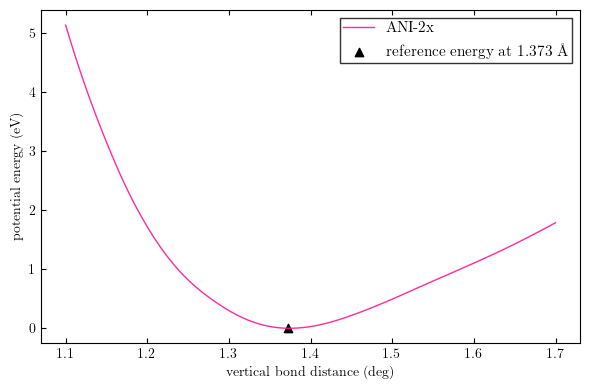

In [70]:

distances_v, energies_v = evaluate_bond(cyclo, bond_ids_v, mask_v,  calculator_list, search_space=[1.1, 1.7])
plot_bond(distances_v, energies_v, calculator_names, calculator_colors, save_dir='./', dist_name='vertical')

In [71]:
traj = trajectory.TrajectoryReader('./bond_scan.traj')
view(traj, viewer='ngl')

computing C0-C1 PES
scan range [1.1, 1.7] Å
evaluating 100 distances
distances:
[1.1        1.10606061 1.11212121 1.11818182 1.12424242 1.13030303
 1.13636364 1.14242424 1.14848485 1.15454545 1.16060606 1.16666667
 1.17272727 1.17878788 1.18484848 1.19090909 1.1969697  1.2030303
 1.20909091 1.21515152 1.22121212 1.22727273 1.23333333 1.23939394
 1.24545455 1.25151515 1.25757576 1.26363636 1.26969697 1.27575758
 1.28181818 1.28787879 1.29393939 1.3        1.30606061 1.31212121
 1.31818182 1.32424242 1.33030303 1.33636364 1.34242424 1.34848485
 1.35454545 1.36060606 1.36666667 1.37272727 1.37878788 1.38484848
 1.39090909 1.3969697  1.4030303  1.40909091 1.41515152 1.42121212
 1.42727273 1.43333333 1.43939394 1.44545455 1.45151515 1.45757576
 1.46363636 1.46969697 1.47575758 1.48181818 1.48787879 1.49393939
 1.5        1.50606061 1.51212121 1.51818182 1.52424242 1.53030303
 1.53636364 1.54242424 1.54848485 1.55454545 1.56060606 1.56666667
 1.57272727 1.57878788 1.58484848 1.59090909 1.596

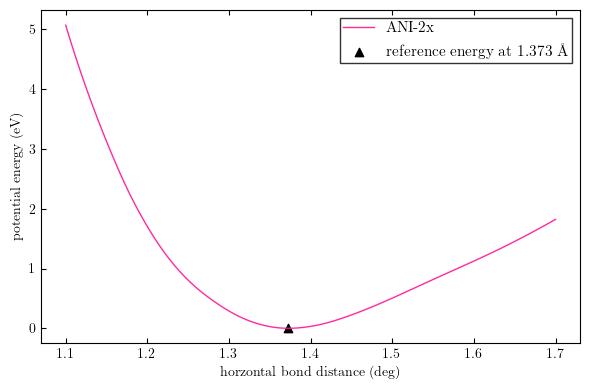

In [72]:

cyclo = pubchem_atoms_search(smiles='C1=CC=C1')
cyclo.set_distance(bond_ids_h[0], bond_ids_h[1], 1.400000, fix=0, mask=mask_h)
cyclo.set_distance(bond_ids_v[0], bond_ids_v[1], 1.400000, fix=0, mask=mask_v)
view(cyclo)

# deformació hortiztonal
distances_h, energies_h = evaluate_bond(cyclo, bond_ids_h, mask_h,  calculator_list, search_space=[1.1, 1.7])
plot_bond(distances_h, energies_h, calculator_names, calculator_colors, save_dir='./', dist_name='horzontal')

traj = trajectory.TrajectoryReader('./bond_scan.traj')
view(traj, viewer='ngl')

In [73]:
energy_matrix = []

molecule = pubchem_atoms_search(smiles='C1=CC=C1')

traj_path = os.path.join('./', 'bond_scan_2D.traj')
traj = trajectory.TrajectoryWriter(filename=traj_path, mode='w')


for d_x in distances_h:

    temp_list = []

    for d_y in distances_v:
        molecule.set_distance(bond_ids_h[0], bond_ids_h[1], d_x, fix=0, mask=mask_h)
        molecule.set_distance(bond_ids_v[0], bond_ids_v[1], d_y, fix=0, mask=mask_v)

        molecule.calc = CALCULATOR
        
        potential_e = molecule.get_potential_energy()
        temp_list.append(potential_e)

        traj.write(molecule)

    energy_matrix.append(temp_list)

2025-02-06 23:48:50.588 python[16248:217672] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-06 23:48:50.588 python[16248:217672] +[IMKInputSession subclass]: chose IMKInputSession_Modern
2025-02-06 23:48:52.917 python[16421:219774] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-06 23:48:52.917 python[16421:219774] +[IMKInputSession subclass]: chose IMKInputSession_Modern
2025-02-06 23:48:56.353 python[16381:219452] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-06 23:48:56.353 python[16381:219452] +[IMKInputSession subclass]: chose IMKInputSession_Modern
2025-02-06 23:49:01.062 python[16062:214702] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-06 23:49:01.062 python[16062:214702] +[IMKInputSession subclass]: chose IMKInputSession_Modern
2025-02-06 23:49:05.881 python[16510:221574] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-06 23:49:05.881 python[16510:221574] +[IMKInputSession subclass]: chose IMKInputSession_Modern
2025-02-06 23:49:08.383 python

In [74]:
corrected_energy_matrix = np.array(energy_matrix) - np.min(np.array(energy_matrix))

In [75]:
traj = trajectory.TrajectoryReader('./bond_scan_2D.traj')
view(traj, viewer='ngl')

1.3459001523144276 1.4292001819199438


/var/folders/cq/s30xmbh57xndgmhg1zhwclsh0000gn/T/ipykernel_15905/460370900.py:14: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='best')
/var/folders/cq/s30xmbh57xndgmhg1zhwclsh0000gn/T/ipykernel_15905/460370900.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


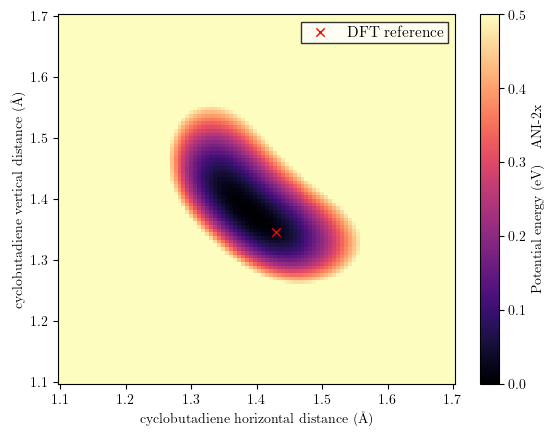

In [96]:
# default distances
cyclo = pubchem_atoms_search(smiles='C1=CC=C1')
#view(cyclo)

vertical = cyclo.get_distance(0, 1)
horzontal = cyclo.get_distance(0, 2)
print(vertical, horzontal)


fig, ax = plt.subplots()
im = ax.pcolormesh(distances_h, distances_v, corrected_energy_matrix, vmax=.5, cmap='magma', label=r'$\textnormal{}$')
ax.scatter(horzontal, vertical, color='red', marker='x', label=r'$\textnormal{DFT reference}$')
ax.set(xlabel=r'$\textnormal{cyclobutadiene horizontal distance (Å)}$', ylabel=r'$\textnormal{cyclobutadiene vertical distance (Å)}$')
ax.legend(loc='best')
fig.colorbar(im, ax=ax, label=r'$\textnormal{Potential energy (eV)}\quad\textnormal{ANI-2x}$')
fig.savefig('./cyclobutadiene_bond_asymmetry_scan.png', dpi=400)
fig.show()



# TODO posar en el plot la distància DFT de referència

Aquest és un exemple on el model prediu correctament les asimetries del sistema. Existeixen certes molècules on el trencament de la simetria pot ser beneficiós trencant certes degeneracions i estabilitzant el sistema. Second order Jean Teller effect. 